# In this dataset PCA has been used to protect the user identity for the transaction

In [68]:
# 0  -> valid transaction
# 1  -> fraud transaction
#-1 -> Outlier
#dataset -> https://www.kaggle.com/mlg-ulb/creditcardfraud

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
data=pd.read_csv('creditcard.csv')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [108]:
data.shape

(284807, 31)

In [109]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [110]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [111]:
#Determine no. of fraud cases in dataset

valid = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

outlier = len(fraud)/float(len(valid))
print(outlier)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


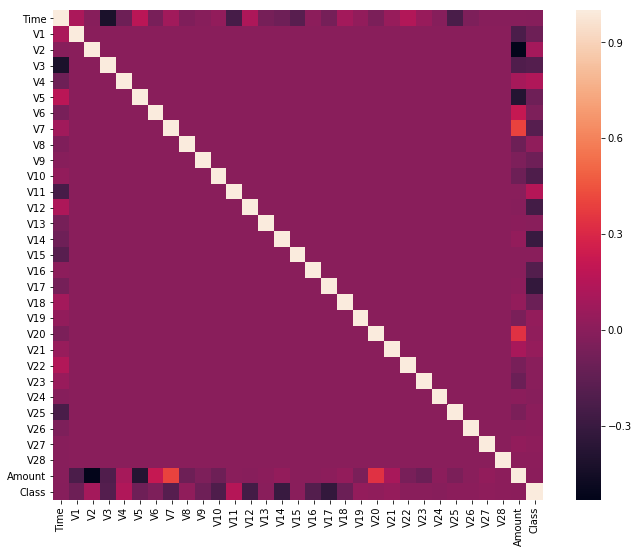

In [112]:
#correlation matrix
corrmax = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmax, square=True)

In [113]:
from sklearn.preprocessing import StandardScaler
data['n_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount','Time'], axis=1)

In [114]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,n_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [115]:
x = data.iloc[:,data.columns != 'Class']
y = data.iloc[:,data.columns == 'Class']

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [117]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test) 

In [118]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364, 1)
(85443, 1)


# Deep NN

In [119]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [120]:
model = Sequential([
    Dense(units=16,input_dim=29,activation='relu'),
    Dense(units=16,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [121]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 20)                340       
_________________________________________________________________
dense_24 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 25        
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
199364/199364 [==============================] - 9s 46us/step - loss: 0.0192 - acc: 0.9979
Epoch 2/50
199364/199364 [==============================] - 4s 22us/step - loss: 0.0047 - acc: 0.9988
Epoch 3/50
199364/199364 [==============================] - 4s 22us/step - loss: 0.0038 - acc: 0.9989
Epoch 4/50
199364/199364 [==============================] - 4s 22us/step - loss: 0.0034 - acc: 0.9993
Epoch 5/50
199364/199364 [==============================] - 5s 23us/step - loss: 0.0032 - acc: 0.9993
Epoch 6/50
199364/199364 [==============================] - 4s 22us/step - loss: 0.0030 - acc: 0.9993
Epoch 7/50
199364/199364 [==============================] - 5s 23us/step - loss: 0.0028 - acc: 0.9994
Epoch 8/50
199364/199364 [==============================] - 5s 23us/step - loss: 0.0027 - acc: 0.9994
Epoch 9/50
199364/199364 [==============================] - 5s 23us/step - loss: 0.0027 - acc: 0.9994
Epoch 10/50
199364/199364 [=======

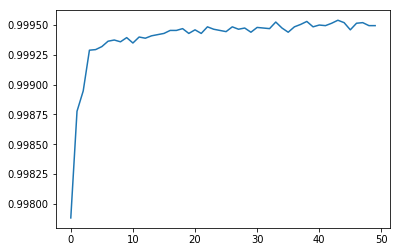

In [122]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
result = model.fit(x_train,y_train,batch_size=100,epochs=50)
plt.plot(result.history['acc'])

In [124]:
score = model.evaluate(x_test,y_test)
print(score)

85443/85443 [==============================] - 3s 35us/step
[0.004334576347695936, 0.9993328885923949]


In [173]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(cm,
                          classes,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if classes is not None:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

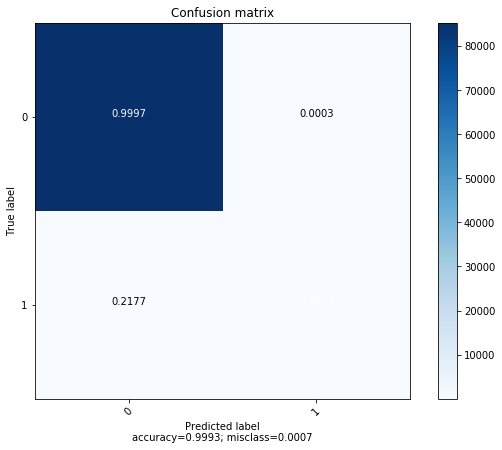

[[85271    25]
 [   32   115]]


In [174]:
y_pred = model.predict(x_test)
y_test = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
print(cnf_matrix)

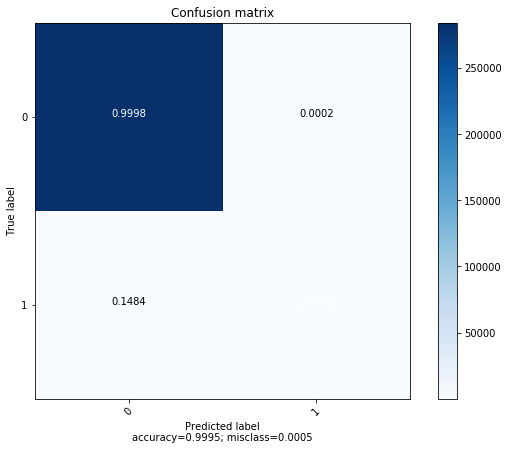

[[284250     65]
 [    73    419]]


In [175]:
y_pred = model.predict(x)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
print(cnf_matrix)

# Now using Random Forest ML Models

In [176]:
data=pd.read_csv('creditcard.csv')

from sklearn.preprocessing import StandardScaler
data['n_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount','Time'], axis=1)

x = data.iloc[:,data.columns != 'Class']
y = data.iloc[:,data.columns == 'Class']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [177]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [178]:
y_pred=random_forest.predict(x_test)

In [179]:
random_forest.score(x_test,y_test)

0.9995201479348805

[[85289     7]
 [   34   113]]


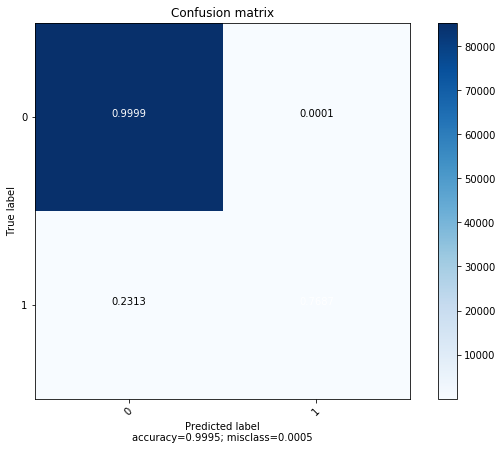

In [185]:
cnf_matrix=confusion_matrix(y_test,y_pred)
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

[[284308      7]
 [    34    458]]


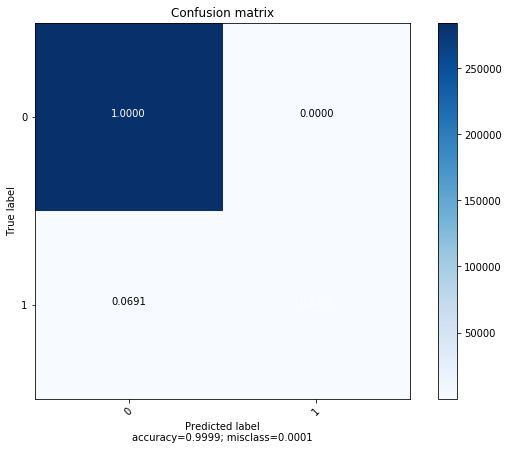

In [186]:
y_pred=random_forest.predict(x)
cnf_matrix = confusion_matrix(y, y_pred.round())
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

# Nw using Undersampling

In [187]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [188]:
normal_indices = data[data.Class == 0].index

random_normal_indices = np.random.choice(normal_indices,number_records_fraud,replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [190]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [191]:
under_sample_data = data.iloc[under_sample_indices,:]
x_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

x_train,x_test,y_train,y_test = train_test_split(x_undersample,y_undersample,test_size=0.3,random_state=0)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test) 

In [192]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 20)                340       
_________________________________________________________________
dense_24 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 25        
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________


In [193]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
result = model.fit(x_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
688/688 [==============================] - 3s 4ms/step - loss: 0.4150 - acc: 0.9448
Epoch 2/5
688/688 [==============================] - 0s 151us/step - loss: 0.2692 - acc: 0.9549
Epoch 3/5
688/688 [==============================] - 0s 145us/step - loss: 0.1702 - acc: 0.9666
Epoch 4/5
688/688 [==============================] - 0s 142us/step - loss: 0.1439 - acc: 0.9666
Epoch 5/5
688/688 [==============================] - 0s 155us/step - loss: 0.1266 - acc: 0.9709


[[141   8]
 [  7 140]]


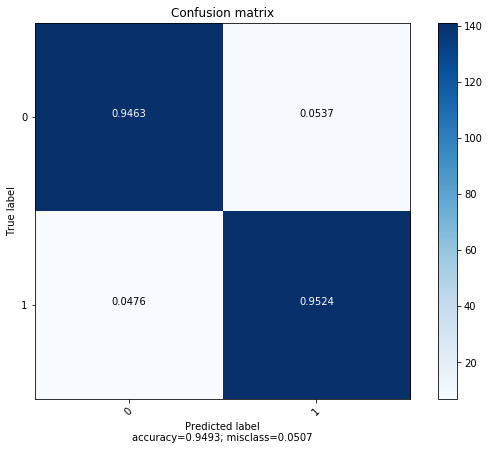

In [197]:
y_pred=model.predict(x_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix,classes=[0,1])